<a href="https://colab.research.google.com/github/matt-breeden/colab-public/blob/main/ml_test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.set_printoptions(precision=2)
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
df = pd.read_csv("ml_data_5.csv")

In [ ]:
# Function to clean up entries
def transform_table_value(value):
    if isinstance(value, str):
        if value.endswith('%'):
          return float(value.rstrip('%')) / 100.0
        else:
          return float(value.replace(',', '').replace('$', ''))
    else:
        return value

In [ ]:
def model_algorithm_linr(features_df, label_df):
    X = features_df
    y = label_df

    # Split Data into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize Linear Regression Model
    model = LinearRegression()

    # Fit Model to Training Data
    model.fit(X_train, y_train)

    # Predict Labels for Testing Data
    y_pred = model.predict(X_test)
    # print("\n y_test - y_pred:", y_test - y_pred)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print("root mse:", mse ** 0.5)

    # Extract Coefficients
    coefficients = model.coef_
    intercept = model.intercept_
    print("Coefficients:", coefficients)
    print("Intercept:", intercept)

    return coefficients, intercept, X_train, X_test, y_train, y_test, y_pred, mse

In [ ]:
def model_algorithm_sgdr(features_df, label_df):
  X = features_df
  y = label_df

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  scaler = StandardScaler()
  X_train_norm = scaler.fit_transform(X_train, y_train)
  X_test_norm = scaler.fit_transform(X_test, y_test)

  model = SGDRegressor(max_iter=1000)
  model.fit(X_train_norm, y_train.values.ravel())

  print(f"sgd regressor - number of iterations completed: {model.n_iter_}, number of weight updates: {model.t_}")

  # make a prediction using sgdr.predict()
  y_pred = model.predict(X_test_norm)
  y_pred_train = model.predict(X_train_norm)

  mse = mean_squared_error(y_test, y_pred)
  print("Mean Squared Error:", mse)
  print("root mse:", mse ** 0.5)

  coefficients = model.coef_
  intercept = model.intercept_
  print("Coefficients:", coefficients)
  print("Intercept:", intercept)

  return coefficients, intercept, X_train, X_test, y_train, y_test, y_pred, mse, X_train_norm, X_test_norm, y_pred_train

In [ ]:
def scale_df(df):
    # scaled_df = scale(df, axis=0, with_mean=True, with_std=True, copy=True)
    scaled_df = pd.DataFrame(scale(df, axis=0, with_mean=True, with_std=True, copy=True), columns=df.columns)
    return scaled_df

In [ ]:
def plot_features_against_label(feature_columns, label_columns, feature_df, label_df):
  count_features = len(feature_columns)
  # row_count = int(np.ceil(count_features / 4))
  # plot predictions and targets vs original features
  fig,ax=plt.subplots(1,count_features,figsize=(count_features * 3.5,3),sharey=True)
  y_values = np.array(label_df[label_columns[0]]) #/ np.max(np.array(label_df[label_columns[0]]))
  if count_features == 1:
      ax.scatter(np.array(feature_df[feature_columns[0]]),
                    y_values,
                    color="purple",
                    label = 'data')
      ax.set_xlabel(feature_columns[0])
      ax.set_ylabel(label_columns[0]);
      ax.legend();
      plt.show()
  else:
    for i in range(count_features):
        ax[i].scatter(np.array(feature_df[feature_columns[i]]),
                      y_values,
                      color="purple",
                      label = 'data')
        ax[i].set_xlabel(feature_columns[i])
        #ax[i].scatter(np.array(feature_df[feature_columns[i]]),np.array(label_df[label_columns[0]]),color="blue", label = 'predict')
    ax[0].set_ylabel(label_columns[0]);
    ax[0].legend();
    #fig.suptitle("target versus prediction using z-score normalized model")
    plt.show()

In [ ]:
def plot_target_vs_predictions(feature_columns, label_columns, X_values, y_values, y_pred):
  count_features = len(feature_columns)
  fig,ax=plt.subplots(1,count_features,figsize=(count_features * 3.5,3),sharey=True)
  fig.suptitle("label versus prediction")
  X_values_array = np.array(X_values)
  if count_features == 1:
    ax.scatter(X_values_array[:,0],y_values,color="blue", label = 'label')
    ax.set_xlabel(feature_columns[0])
    ax.scatter(X_values_array[:,0],y_pred,color="orange", label = 'predict')
    ax.set_ylabel(label_columns[0]); ax.legend();
    plt.show()
  else:
    for i in range(count_features):
        ax[i].scatter(X_values_array[:,i],y_values,color="blue", label = 'label')
        ax[i].set_xlabel(feature_columns[i])
        ax[i].scatter(X_values_array[:,i],y_pred,color="orange", label = 'predict')
    ax[0].set_ylabel(label_columns[0]); ax[0].legend();
    plt.show()

In [ ]:
def handle_model(dataset_df, feature_columns, label_column):
  feature_df = dataset_df[feature_columns]
  label_df = dataset_df[[label_column]]
  scaled_feature_df = scale_df(feature_df)

  print("data (features X, label y)")
  plot_features_against_label(feature_columns, [label_column], feature_df, label_df)
  # plot_features_against_label(feature_columns, [label_column], scaled_feature_df, label_df)

  print("\n")
  print("FEATURES")
  display(feature_df.describe())

  print("\n")
  print("LABEL")
  display(label_df.describe())

  # print("\n")
  # print("SCALED")
  # display(scaled_feature_df.describe())

  print("\n")
  print("linear regression")
  coefficients, intercept, X_train, X_test, y_train, y_test, y_pred, mse = model_algorithm_linr(feature_df, label_df)
  plot_target_vs_predictions(feature_columns, [label_column], X_test, y_test, y_pred)

  print("\n")
  print("linear regression (scaled)")
  coefficients_LINRS, intercept_LINRS, X_train_LINRS, X_test_LINRS, y_train_LINRS, y_test_LINRS, y_pred_LINRS, mse_LINRS = model_algorithm_linr(scaled_feature_df, label_df)
  plot_target_vs_predictions(feature_columns, [label_column], X_test_LINRS, y_test_LINRS, y_pred_LINRS)

  print("\n")
  print("stochastic gradient descent")
  coefficients_SGDR, intercept_SGDR, X_train_SGDR, X_test_SGDR, y_train_SGDR, y_test_SGDR, y_pred_SGDR, mse_SGDR, X_train_norm_SGDR, X_test_norm_SGDR, y_pred_train_SGDR = model_algorithm_sgdr(feature_df, label_df)
  print("plot of unnormed test data")
  plot_target_vs_predictions(feature_columns, [label_column], X_test_SGDR, y_test_SGDR, y_pred_SGDR)
  print("plot of normed test data")
  plot_target_vs_predictions(feature_columns, [label_column], X_test_norm_SGDR, y_test_SGDR, y_pred_SGDR)
  print("plot of unnormed train data")
  plot_target_vs_predictions(feature_columns, [label_column], X_train_SGDR, y_train_SGDR, y_pred_train_SGDR)

In [ ]:
df

,Doctors,Associates,Production Net,Collection Net,New Patient Calls,Total Starts,Total Aligner Starts,Aligner SOC,Start Full,Full (Adult),...,Expenses Professional Fees,Expenses Insurance,Expenses Professional Taxes,Expenses Professional Meals,Total Other Practice Expenses,Other Practice % of Net Collect,Compensation Associates Benefits,Compensation Associates,Total Associate Compensation,Associate % of Net Collect
0,1.00,1.00,"$ 3,752,251","$ 3,636,971",1163,638,126,19.75%,334,61,...,36094.11,30104.57,30147.64,0,256981.06,7%,245.68,0,245.68,0%
1,1.00,1.00,"$ 3,717,401","$ 3,505,244","1,018",654,161,24.62%,390,62,...,"20,259.00",0.00,0.00,0.00,"234,498.00",7%,"1,597.00",0.00,"1,597.00",0%
2,1.00,0.00,"$ 1,841,436","$ 1,333,009",744,356,94,26.40%,195,0,...,"2,160.50","7,664.51","10,276.33","8,945.67","83,376.75",6%,0.00,677.92,677.92,0%
3,1.00,0.00,"$ 3,250,682","$ 2,844,186",888,662,127,19.18%,412,95,...,"38,341.42","2,452.24","1,168.79","3,958.25","283,415.71",10%,0.00,"1,950.00","1,950.00",0%
4,1.00,0.00,"$ 7,155,740","$ 6,632,283",2017,"1,408",411,29.19%,719,166,...,23419.45,23570.08,16698.07,0,288843.36,4%,0,10000,10000,0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,1.00,0.00,"$ 874,106","$ 945,750",309,178,64,35.96%,27,0,...,"24,010.03","4,349.50","4,995.30","5,877.19","146,336.00",15%,0.00,0.00,0.00,0%
338,2.00,0.00,"$ 3,483,726","$ 3,563,828","1,011",772,269,34.84%,345,35,...,"56,337.75",-797.00,0.00,0.00,"167,167.06",5%,0.00,0.00,0.00,0%
339,1.00,0.00,"$ 862,905","$ 578,664",362,195,0,0.00%,160,0,...,"5,363.99","1,864.29",0.00,"4,392.88","44,519.80",8%,0.00,0.00,0.00,0%
340,2.00,0.00,"$ 3,488,492","$ 3,406,784","1,280",643,261,40.59%,364,0,...,"31,130.68","6,641.00",0.00,0.00,"121,660.85",4%,0.00,0.00,0.00,0%


In [ ]:
columns = df.columns.to_numpy()
print(columns)

['Doctors' 'Associates' 'Production Net' 'Collection Net'
 'New Patient Calls' 'Total Starts' 'Total Aligner Starts' 'Aligner SOC'
 'Start Full' 'Full (Adult)' 'Full (Child)' 'Start Phase1'
 'Phase1 (Align)' 'Phase1 (Fixed)' 'Start Phase2' 'Phase2 (Align)'
 'Phase2 (Fixed)' 'Start Align' 'Align (Adult)' 'Align (Child)'
 'Start Limited' 'Lmtd (Align Adult)' 'Lmtd (Align Child)'
 'Lmtd (Fixed Adult)' 'Lmtd (Fixed Child)' 'Start Other' 'Tx Full Count'
 'Tx Full Visits' 'Tx Full Contract' 'Tx Phase1 Count' 'Tx Phase1 Visits'
 'Tx Phase1 Contract' 'Tx Phase2 Count' 'Tx Phase2 Visits'
 'Tx Phase2 Contract' 'Tx Aligner Count' 'Tx Aligner Visits'
 'Tx Aligner Contract' 'VPV Brackets' 'VPV Aligners'
 'Total Visits Brackets' 'Total Visits Aligners'
 'Total OH % of Net Collect' 'Total OH Expenses' 'Staff Compensation'
 'Staff Benefits' 'Staff Taxes' 'Staff Other' 'Total Staff Expenses'
 'Staff % of Net Collect' 'Supplies Invisalign'
 'Supplies In-House Aligner' 'Supplies Other Aligner'
 'Total Al

In [ ]:
full_df = df.copy()
full_df = full_df.applymap(transform_table_value)

full_df['Conversion Rate'] = full_df['Total Starts'] / full_df['New Patient Calls']

full_df

,Doctors,Associates,Production Net,Collection Net,New Patient Calls,Total Starts,Total Aligner Starts,Aligner SOC,Start Full,Full (Adult),...,Expenses Insurance,Expenses Professional Taxes,Expenses Professional Meals,Total Other Practice Expenses,Other Practice % of Net Collect,Compensation Associates Benefits,Compensation Associates,Total Associate Compensation,Associate % of Net Collect,Conversion Rate
0,1.00,1.00,3752251.00,3636971.00,1163.00,638.00,126,0.20,334.00,61,...,30104.57,30147.64,0.00,256981.06,0.07,245.68,0.00,245.68,0.00,0.55
1,1.00,1.00,3717401.00,3505244.00,1018.00,654.00,161,0.25,390.00,62,...,0.00,0.00,0.00,234498.00,0.07,1597.00,0.00,1597.00,0.00,0.64
2,1.00,0.00,1841436.00,1333009.00,744.00,356.00,94,0.26,195.00,0,...,7664.51,10276.33,8945.67,83376.75,0.06,0.00,677.92,677.92,0.00,0.48
3,1.00,0.00,3250682.00,2844186.00,888.00,662.00,127,0.19,412.00,95,...,2452.24,1168.79,3958.25,283415.71,0.10,0.00,1950.00,1950.00,0.00,0.75
4,1.00,0.00,7155740.00,6632283.00,2017.00,1408.00,411,0.29,719.00,166,...,23570.08,16698.07,0.00,288843.36,0.04,0.00,10000.00,10000.00,0.00,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,1.00,0.00,874106.00,945750.00,309.00,178.00,64,0.36,27.00,0,...,4349.50,4995.30,5877.19,146336.00,0.15,0.00,0.00,0.00,0.00,0.58
338,2.00,0.00,3483726.00,3563828.00,1011.00,772.00,269,0.35,345.00,35,...,-797.00,0.00,0.00,167167.06,0.05,0.00,0.00,0.00,0.00,0.76
339,1.00,0.00,862905.00,578664.00,362.00,195.00,0,0.00,160.00,0,...,1864.29,0.00,4392.88,44519.80,0.08,0.00,0.00,0.00,0.00,0.54
340,2.00,0.00,3488492.00,3406784.00,1280.00,643.00,261,0.41,364.00,0,...,6641.00,0.00,0.00,121660.85,0.04,0.00,0.00,0.00,0.00,0.50


In [ ]:
full_df.describe()

,Doctors,Associates,Production Net,Collection Net,New Patient Calls,Total Starts,Total Aligner Starts,Aligner SOC,Start Full,Full (Adult),...,Expenses Insurance,Expenses Professional Taxes,Expenses Professional Meals,Total Other Practice Expenses,Other Practice % of Net Collect,Compensation Associates Benefits,Compensation Associates,Total Associate Compensation,Associate % of Net Collect,Conversion Rate
count,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,...,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00
mean,1.32,0.39,3613568.05,3441799.49,1133.86,705.60,175.59,0.25,344.62,45.57,...,18685.71,31460.35,8589.49,265673.29,0.08,1511.97,64330.35,65842.31,0.01,0.65
std,0.59,0.79,2080217.22,1960006.97,691.65,374.82,155.42,0.18,250.86,64.55,...,34119.93,98320.47,11930.74,181310.07,0.04,8622.51,137780.10,140626.16,0.03,0.13
min,1.00,0.00,570948.00,553906.00,202.00,127.00,0.00,0.00,5.00,0.00,...,-797.00,-26622.85,0.00,41100.62,0.02,0.00,0.00,0.00,0.00,0.21
25%,1.00,0.00,2138983.00,2097626.00,667.50,437.00,73.00,0.13,178.00,0.00,...,6106.78,193.00,0.00,156178.08,0.06,0.00,0.00,0.00,0.00,0.56
50%,1.00,0.00,3271422.00,3139644.50,1000.00,643.00,126.50,0.21,299.00,22.00,...,10829.74,6185.98,4338.84,219948.96,0.07,0.00,0.00,0.00,0.00,0.65
75%,2.00,1.00,4420504.00,4268360.25,1394.50,890.00,240.25,0.33,438.00,68.00,...,20470.92,28593.29,11269.26,321872.10,0.10,0.00,48207.10,50305.28,0.02,0.74
max,4.00,5.00,13323818.00,12194178.00,4957.00,2714.00,889.00,0.94,1777.00,534.00,...,432115.22,1495391.60,67836.25,1735348.57,0.25,100088.00,987549.00,1052614.00,0.15,1.01


In [ ]:
main_metric_columns = ['Doctors', 'Associates',
                       'Production Net', 'Collection Net',
                       'New Patient Calls', 'Total Starts', 'Total Aligner Starts',
                       'Aligner SOC', 'Conversion Rate',
                       'VPV Brackets', 'VPV Aligners',
                       'Total Visits Brackets', 'Total Visits Aligners']
main_metric_df = full_df[main_metric_columns]
display(main_metric_df.describe())

,Doctors,Associates,Production Net,Collection Net,New Patient Calls,Total Starts,Total Aligner Starts,Aligner SOC,Conversion Rate,VPV Brackets,VPV Aligners,Total Visits Brackets,Total Visits Aligners
count,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00
mean,1.32,0.39,3613568.05,3441799.49,1133.86,705.60,175.59,0.25,0.65,306.78,442.38,18.20,12.45
std,0.59,0.79,2080217.22,1960006.97,691.65,374.82,155.42,0.18,0.13,123.80,169.72,4.25,4.27
min,1.00,0.00,570948.00,553906.00,202.00,127.00,0.00,0.00,0.21,1.00,5.00,3.00,3.00
25%,1.00,0.00,2138983.00,2097626.00,667.50,437.00,73.00,0.13,0.56,250.00,355.00,15.25,10.00
50%,1.00,0.00,3271422.00,3139644.50,1000.00,643.00,126.50,0.21,0.65,313.50,439.50,18.00,12.00
75%,2.00,1.00,4420504.00,4268360.25,1394.50,890.00,240.25,0.33,0.74,357.75,550.75,20.00,14.00
max,4.00,5.00,13323818.00,12194178.00,4957.00,2714.00,889.00,0.94,1.01,1126.00,1168.00,50.00,38.00


In [ ]:
starts_columns = ['Start Full', 'Full (Adult)', 'Full (Child)',
                  'Start Phase1','Phase1 (Align)', 'Phase1 (Fixed)',
                  'Start Phase2', 'Phase2 (Align)','Phase2 (Fixed)',
                  'Start Align', 'Align (Adult)', 'Align (Child)',
                  'Start Limited', 'Lmtd (Align Adult)', 'Lmtd (Align Child)','Lmtd (Fixed Adult)', 'Lmtd (Fixed Child)',
                  'Start Other']
starts_df = full_df[starts_columns]
display(starts_df.describe())

,Start Full,Full (Adult),Full (Child),Start Phase1,Phase1 (Align),Phase1 (Fixed),Start Phase2,Phase2 (Align),Phase2 (Fixed),Start Align,Align (Adult),Align (Child),Start Limited,Lmtd (Align Adult),Lmtd (Align Child),Lmtd (Fixed Adult),Lmtd (Fixed Child),Start Other
count,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00
mean,344.62,45.57,170.11,96.46,3.86,55.75,56.43,5.84,31.35,155.95,65.87,27.80,37.92,9.17,0.77,8.61,5.32,14.21
std,250.86,64.55,181.22,82.53,15.04,72.14,54.38,18.06,41.22,141.23,84.44,47.87,53.78,17.43,2.60,27.33,15.79,22.65
min,5.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,178.00,0.00,0.00,46.00,0.00,0.00,21.00,0.00,0.00,63.25,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00
50%,299.00,22.00,129.00,77.00,0.00,39.00,43.00,0.00,19.00,110.00,40.00,6.50,22.50,0.00,0.00,2.00,0.00,5.00
75%,438.00,68.00,262.25,114.25,0.00,77.75,73.00,4.00,44.00,208.00,94.75,34.50,46.00,10.75,0.00,9.00,3.00,19.75
max,1777.00,534.00,1106.00,675.00,173.00,671.00,345.00,262.00,332.00,873.00,487.00,405.00,648.00,131.00,25.00,453.00,175.00,155.00


In [ ]:
treatment_columns = ['Tx Full Count','Tx Full Visits', 'Tx Full Contract',
                     'Tx Phase1 Count', 'Tx Phase1 Visits','Tx Phase1 Contract',
                     'Tx Phase2 Count', 'Tx Phase2 Visits','Tx Phase2 Contract',
                     'Tx Aligner Count', 'Tx Aligner Visits','Tx Aligner Contract']
treatment_df = full_df[treatment_columns]
display(treatment_df.describe())

,Tx Full Count,Tx Full Visits,Tx Full Contract,Tx Phase1 Count,Tx Phase1 Visits,Tx Phase1 Contract,Tx Phase2 Count,Tx Phase2 Visits,Tx Phase2 Contract,Tx Aligner Count,Tx Aligner Visits,Tx Aligner Contract
count,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00
mean,302.50,5369.89,1621956.74,70.66,838.79,223684.56,37.33,640.42,189799.68,104.22,1239.61,564899.35
std,223.32,3780.89,1325494.12,63.58,787.37,241001.35,55.08,991.82,292198.20,114.25,1424.67,687495.57
min,1.00,9.00,4200.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.00,1959.00
25%,140.00,2682.75,690895.00,28.25,321.25,76460.00,3.00,47.75,11075.00,29.00,332.25,117673.75
50%,277.50,4828.50,1448303.82,54.00,620.50,153498.00,20.00,318.00,93120.50,71.00,849.00,353153.57
75%,401.00,7052.50,2207090.38,92.75,1108.75,299309.75,50.75,869.25,237488.62,133.00,1500.75,754794.38
max,1675.00,21054.00,9652694.00,463.00,4823.00,1838400.00,378.00,7450.00,1959886.95,747.00,10029.00,4276923.31


In [ ]:
expenses_source_columns = ['Staff Compensation','Staff Benefits', 'Staff Taxes', 'Staff Other',
                           'Supplies Invisalign','Supplies In-House Aligner', 'Supplies Other Aligner',
                           'Supplies Lab 1','Supplies Lab 2', 'Supplies Lab 3',
                           'Supplies Clinical', 'Supplies Other', 'Supplies COVID',
                           'Marketing Internal','Marketing External', 'Marketing Digital', 'Marketing Wages',
                           'Facility Equipment','Facility Computer', 'Facility COVID', 'Facility Depreciation','Facility Rent', 'Facility Utilities', 'Facility Repairs', 'Facility Other',
                           'Expenses Office Supplies', 'Expenses Other', 'Expenses Professional Fees','Expenses Insurance', 'Expenses Professional Taxes','Expenses Professional Meals',
                           'Compensation Associates Benefits','Compensation Associates']

expenses_source_df = full_df[expenses_source_columns]
display(expenses_source_df.describe())

expenses_subtotal_columns = ['Total Lab Expenses',
                             'Total Clinical Expenses']

expenses_subtotal_df = full_df[expenses_subtotal_columns]
display(expenses_subtotal_df.describe())

expenses_total_columns = ['Total Staff Expenses',
                          'Total Aligner Expenses',
                          'Total Clinical and Lab',
                          'Total Marketing',
                          'Total Equipment and Facility',
                          'Total Other Practice Expenses',
                          'Total Associate Compensation',
                          'Total OH Expenses']

expenses_total_df = full_df[expenses_total_columns]
display(expenses_total_df.describe())

expenses_percent_net_collect_columns = ['Staff % of Net Collect',
                                        'Aligner % of Net Collect',
                                        'Clinical and Lab % of Net Collect',
                                        'Marketing % of Net Collect',
                                        'Equip & Facility % of Net Collect',
                                        'Other Practice % of Net Collect',
                                        'Associate % of Net Collect',
                                        'Total OH % of Net Collect']

expenses_percent_net_collect_df = full_df[expenses_percent_net_collect_columns]
display(expenses_percent_net_collect_df.describe())

,Staff Compensation,Staff Benefits,Staff Taxes,Staff Other,Supplies Invisalign,Supplies In-House Aligner,Supplies Other Aligner,Supplies Lab 1,Supplies Lab 2,Supplies Lab 3,...,Facility Repairs,Facility Other,Expenses Office Supplies,Expenses Other,Expenses Professional Fees,Expenses Insurance,Expenses Professional Taxes,Expenses Professional Meals,Compensation Associates Benefits,Compensation Associates
count,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,...,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00
mean,629787.18,60192.26,69120.75,25158.30,123514.36,4045.23,68637.68,19103.30,81971.56,16077.01,...,22944.84,32287.58,33668.93,116456.04,56812.76,18685.71,31460.35,8589.49,1511.97,64330.35
std,407436.50,72717.49,87996.36,54033.24,186112.51,19038.18,166968.37,70466.08,107081.07,37433.68,...,28211.85,52167.08,45596.49,84480.97,54515.61,34119.93,98320.47,11930.74,8622.51,137780.10
min,0.00,-68003.25,-36.92,-1642.46,0.00,-300.00,0.00,0.00,0.00,0.00,...,0.00,0.00,-16271.74,-36420.03,0.00,-797.00,-26622.85,0.00,0.00,0.00
25%,353517.79,11294.22,26602.83,3428.41,0.00,0.00,0.00,0.00,11695.75,0.00,...,5034.52,4566.69,11119.50,61493.11,23238.58,6106.78,193.00,0.00,0.00,0.00
50%,542013.20,36200.82,49731.06,11840.98,17413.41,0.00,0.00,0.00,37975.94,0.00,...,13996.02,15586.53,23686.26,96160.55,40922.50,10829.74,6185.98,4338.84,0.00,0.00
75%,794248.54,80303.75,75563.02,31767.79,197942.26,0.00,36572.22,9905.00,101551.09,11527.75,...,29311.92,37419.48,41324.44,152696.92,72241.01,20470.92,28593.29,11269.26,0.00,48207.10
max,2443222.00,373271.00,750298.14,630344.00,946339.00,197728.07,1446388.60,672646.69,653983.68,303990.00,...,225059.16,426511.40,601980.00,451218.00,498727.49,432115.22,1495391.60,67836.25,100088.00,987549.00


,Total Lab Expenses,Total Clinical Expenses
count,342.00,342.00
mean,117151.86,212299.30
std,142863.19,170447.34
min,0.00,0.00
25%,30350.12,101500.46
50%,70555.60,172780.55
75%,156859.53,257883.64
max,1189750.00,1492809.55


,Total Staff Expenses,Total Aligner Expenses,Total Clinical and Lab,Total Marketing,Total Equipment and Facility,Total Other Practice Expenses,Total Associate Compensation,Total OH Expenses
count,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00
mean,781645.83,196197.27,329451.16,100925.35,341919.01,265673.29,65842.31,2081654.22
std,485695.13,219254.67,240715.03,82298.74,195308.00,181310.07,140626.16,1177367.20
min,36895.28,0.00,14677.73,0.00,39462.00,41100.62,0.00,392017.13
25%,438426.93,25281.15,168845.16,41730.12,213410.05,156178.08,0.00,1285702.36
50%,691125.00,136934.78,265925.83,80535.14,298779.85,219948.96,0.00,1791139.39
75%,1000736.22,280144.38,430917.77,136778.25,437433.54,321872.10,50305.28,2585278.21
max,2631120.00,1446388.60,1638117.30,429640.87,1179479.67,1735348.57,1052614.00,6958743.22


,Staff % of Net Collect,Aligner % of Net Collect,Clinical and Lab % of Net Collect,Marketing % of Net Collect,Equip & Facility % of Net Collect,Other Practice % of Net Collect,Associate % of Net Collect,Total OH % of Net Collect
count,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00
mean,0.23,0.06,0.10,0.03,0.11,0.08,0.01,0.63
std,0.07,0.05,0.05,0.02,0.05,0.04,0.03,0.14
min,0.01,0.00,0.01,0.00,0.01,0.02,0.00,0.30
25%,0.19,0.01,0.06,0.02,0.07,0.06,0.00,0.53
50%,0.23,0.05,0.09,0.03,0.10,0.07,0.00,0.62
75%,0.27,0.08,0.12,0.04,0.14,0.10,0.02,0.73
max,0.40,0.30,0.34,0.14,0.29,0.25,0.15,0.97


data (features X, label y)


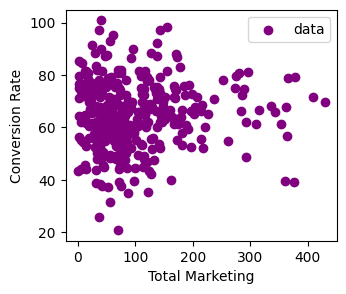



FEATURES


,Total Marketing
count,341.00
mean,101.22
std,82.24
min,0.01
25%,41.89
50%,81.55
75%,137.02
max,429.64




LABEL


,Conversion Rate
count,341.00
mean,64.62
std,13.11
min,20.72
25%,55.95
50%,65.30
75%,73.19
max,100.92




linear regression
Mean Squared Error: 235.26126260024898
root mse: 15.338228796058852
Coefficients: [[0.]]
Intercept: [64.38]


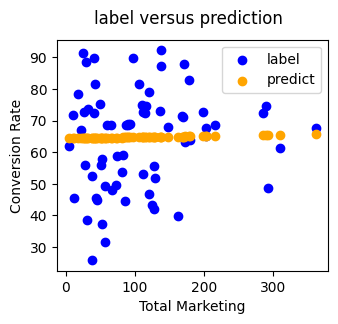



linear regression (scaled)
Mean Squared Error: 235.26126260024893
root mse: 15.33822879605885
Coefficients: [[0.29]]
Intercept: [64.74]


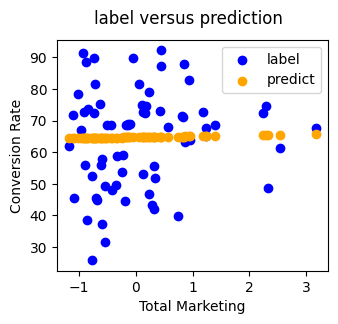



stochastic gradient descent
sgd regressor - number of iterations completed: 29, number of weight updates: 7889.0
Mean Squared Error: 235.2588903001141
root mse: 15.338151462940836
Coefficients: [0.27]
Intercept: [64.75]
plot of unnormed test data


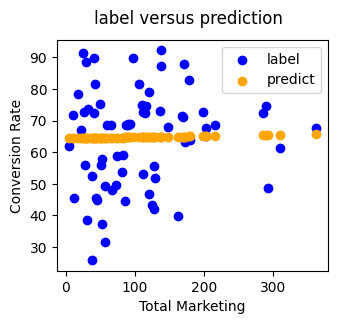

plot of normed test data


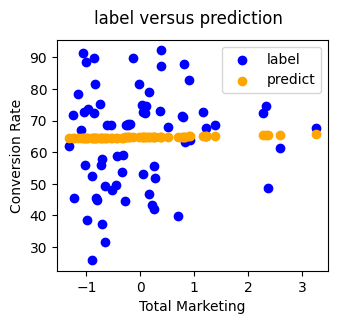

plot of unnormed train data


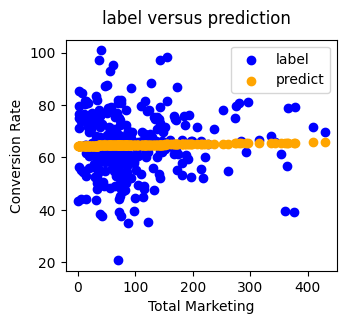




data (features X, label y)


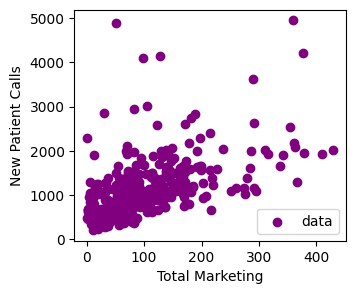



FEATURES


,Total Marketing
count,341.00
mean,101.22
std,82.24
min,0.01
25%,41.89
50%,81.55
75%,137.02
max,429.64




LABEL


,New Patient Calls
count,341.00
mean,1135.06
std,692.30
min,202.00
25%,664.00
50%,1001.00
75%,1395.00
max,4957.00




linear regression
Mean Squared Error: 624775.279956533
root mse: 790.4272768297745
Coefficients: [[4.44]]
Intercept: [669.]


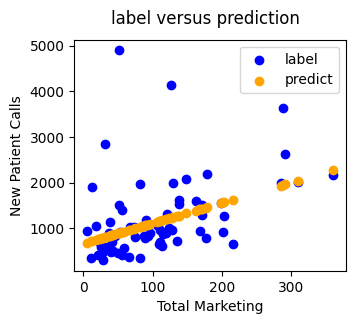



linear regression (scaled)
Mean Squared Error: 624775.279956533
root mse: 790.4272768297745
Coefficients: [[364.87]]
Intercept: [1118.76]


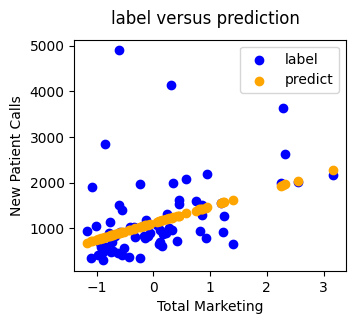



stochastic gradient descent
sgd regressor - number of iterations completed: 25, number of weight updates: 6801.0
Mean Squared Error: 632173.4685374628
root mse: 795.0933709555518
Coefficients: [366.89]
Intercept: [1111.67]
plot of unnormed test data


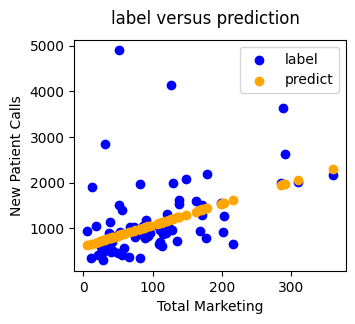

plot of normed test data


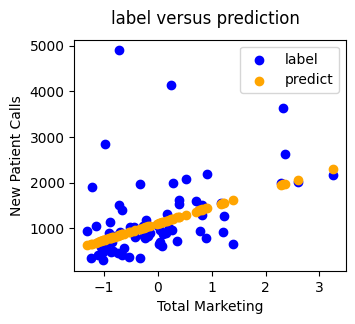

plot of unnormed train data


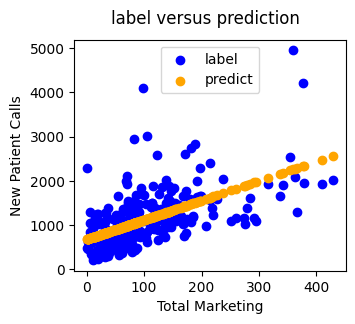

In [ ]:
# EXAMPLE TESTS

# test_feature_columns = ['Doctors', 'Associates', 'New Patient Calls', 'Total Starts', 'Total Aligner Starts',
#                    'Aligner SOC', 'Total Visits Brackets', 'Total Visits Aligners', 'Total OH % of Net Collect',
#                    'Staff % of Net Collect', 'Aligner % of Net Collect', 'Clinical and Lab % of Net Collect',
#                    'Marketing % of Net Collect', 'Equip & Facility % of Net Collect', 'Other Practice % of Net Collect',
#                    'Associate % of Net Collect','Total Marketing','Conversion Rate']
# test_label_columns = ['Production Net', 'Collection Net', 'VPV Brackets', 'VPV Aligners']
# handle_model(full_df, test_feature_columns, test_label_columns[0])
# handle_model(full_df, test_feature_columns, test_label_columns[1])

test_feature_columns_0 = ['Marketing Internal', 'Marketing External', 'Marketing Digital', 'Total Marketing']

test_df_0 = full_df.copy()

# filter and/or transform
test_df_0 = test_df_0[(test_df_0['Total Marketing'] > 0)]
test_df_0['Conversion Rate'] = test_df_0['Conversion Rate'] * 100
test_df_0['Marketing Internal'] = test_df_0['Marketing Internal'] / 1000
test_df_0['Marketing External'] = test_df_0['Marketing External'] / 1000
test_df_0['Marketing Digital'] = test_df_0['Marketing Digital'] / 1000
test_df_0['Marketing Wages'] = test_df_0['Marketing Wages'] / 1000
test_df_0['Total Marketing'] = test_df_0['Total Marketing'] / 1000

handle_model(test_df_0, ['Total Marketing'], 'Conversion Rate')
print("\n\n")
handle_model(test_df_0, ['Total Marketing'], 'New Patient Calls')

data (features X, label y)


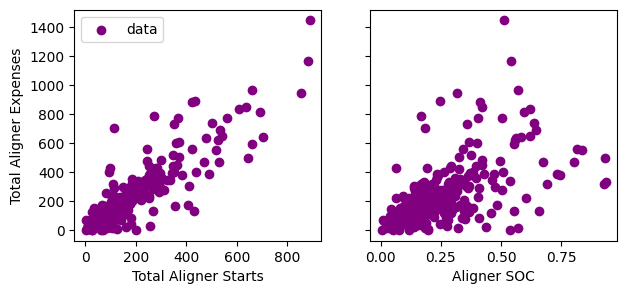



FEATURES


,Total Aligner Starts,Aligner SOC
count,267.00,267.00
mean,188.59,0.26
std,162.19,0.18
min,1.00,0.00
25%,78.50,0.14
50%,138.00,0.22
75%,253.50,0.35
max,889.00,0.94




LABEL


,Total Aligner Expenses
count,267.00
mean,245.30
std,218.97
min,1.46
25%,91.79
50%,187.03
75%,318.43
max,1446.39




linear regression
Mean Squared Error: 11475.962948322134
root mse: 107.12592099171019
Coefficients: [[   1.34 -188.92]]
Intercept: [42.84]


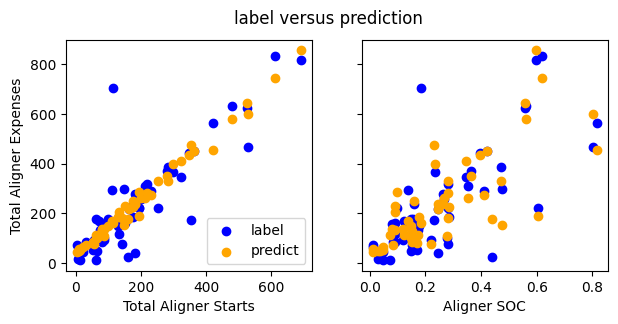



linear regression (scaled)
Mean Squared Error: 11475.962948322134
root mse: 107.12592099171019
Coefficients: [[217.07 -34.2 ]]
Intercept: [246.33]


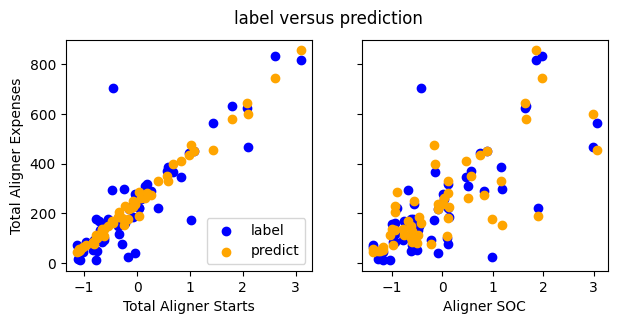



stochastic gradient descent
sgd regressor - number of iterations completed: 61, number of weight updates: 12994.0
Mean Squared Error: 11577.170304685284
root mse: 107.59725974524297
Coefficients: [217.24 -32.5 ]
Intercept: [246.74]
plot of unnormed test data


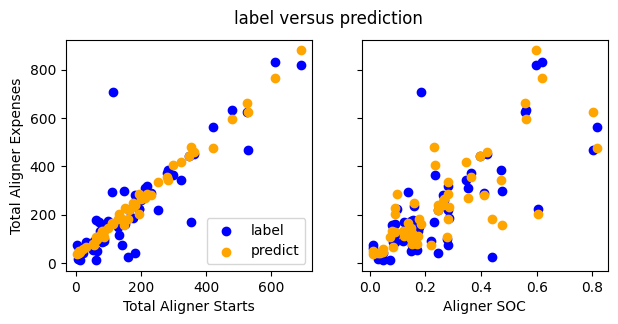

plot of normed test data


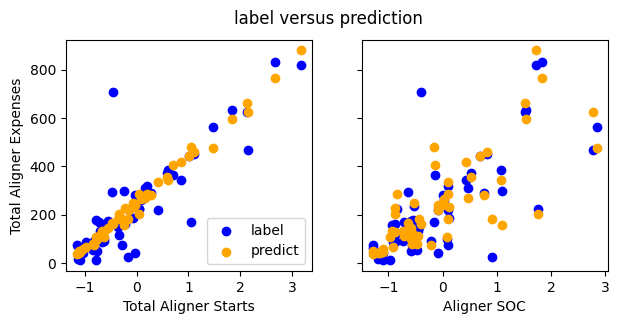

plot of unnormed train data


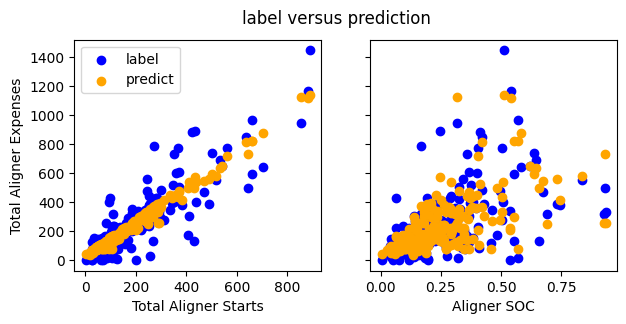

In [ ]:
test_feature_columns_1 = ['Total Aligner Starts', 'Aligner SOC']
test_label_column_1 = 'Total Aligner Expenses'

test_df_1 = full_df.copy()

# filter and/or transform
test_df_1 = test_df_1[(test_df_1['Aligner SOC'] > 0) & (test_df_1['Total Aligner Starts'] > 0) & (test_df_1['Total Aligner Expenses'] > 0)]
test_df_1['Total Aligner Expenses'] = test_df_1['Total Aligner Expenses'] / 1000

handle_model(test_df_1, test_feature_columns_1, test_label_column_1)

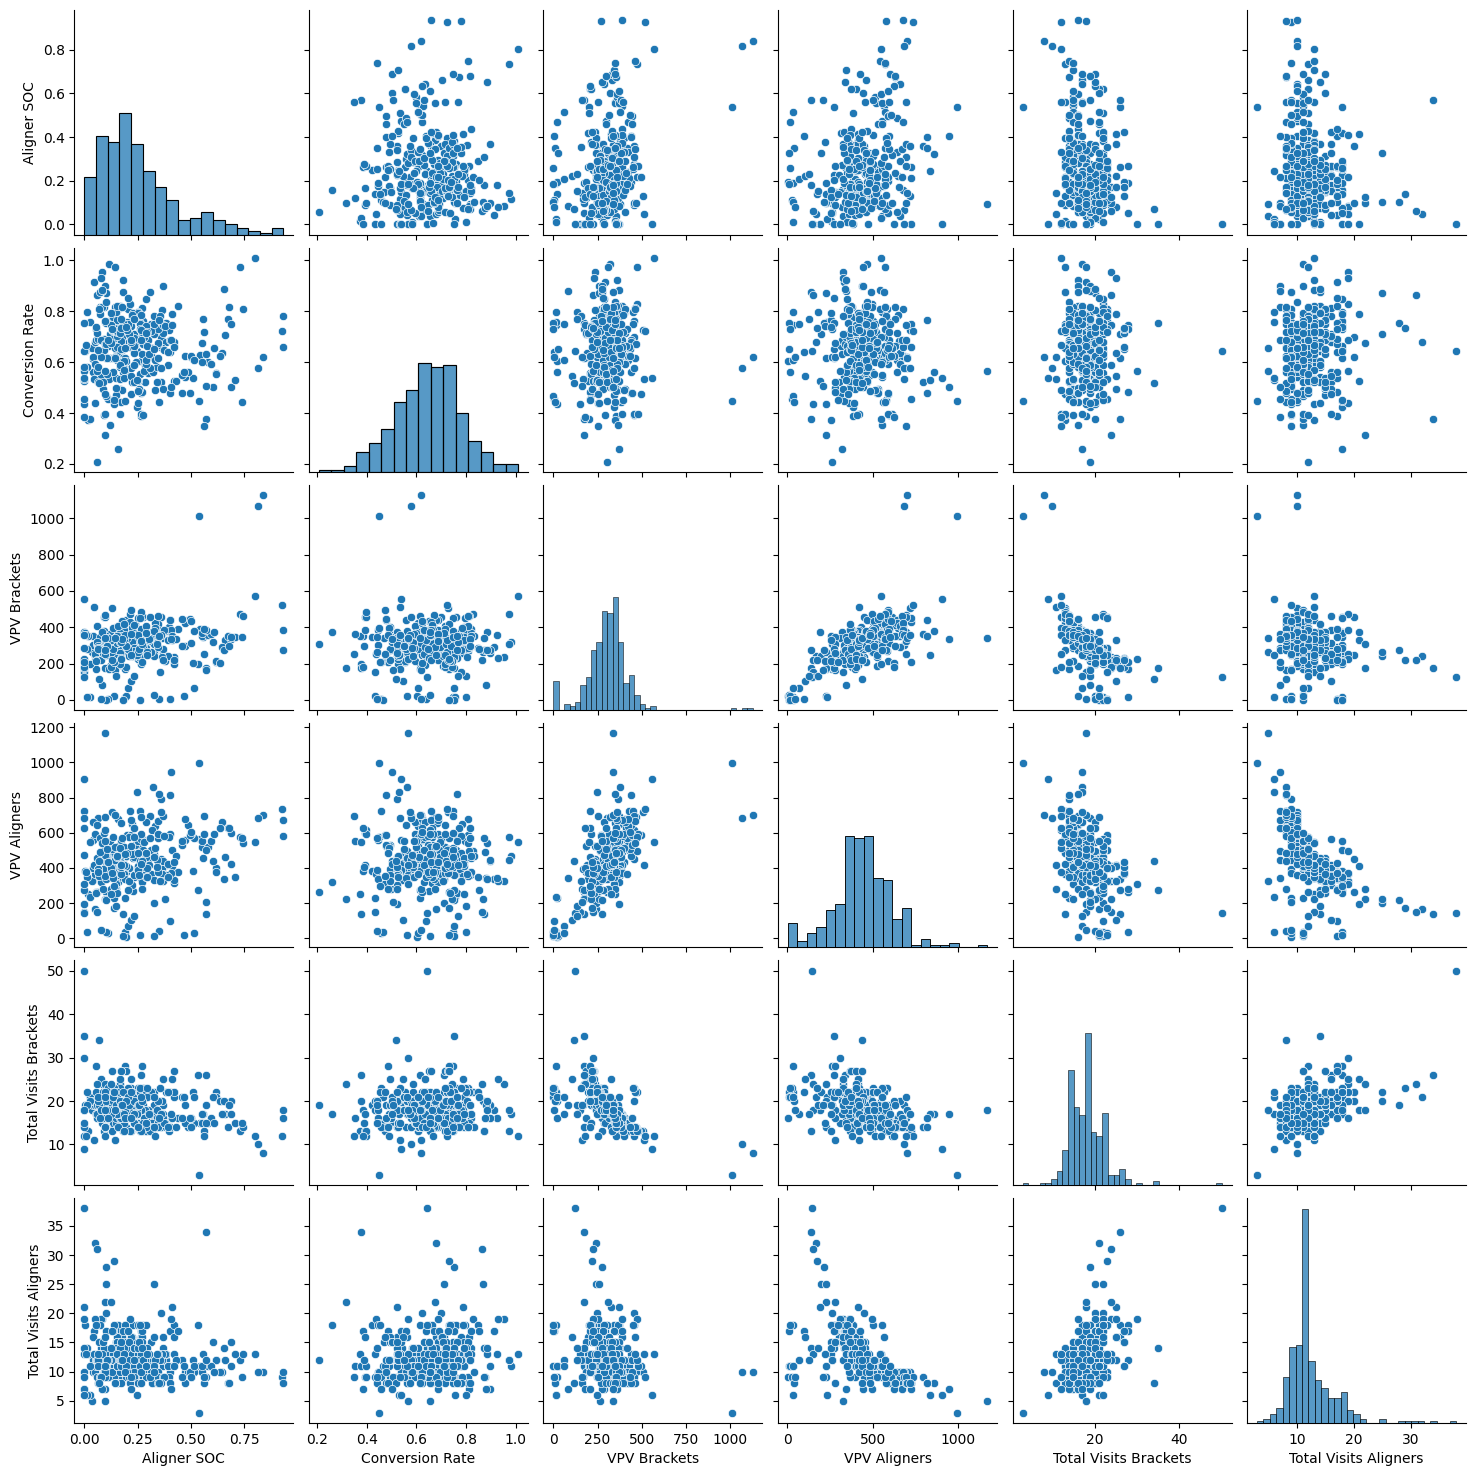

In [ ]:
sns.pairplot(main_metric_df.iloc[:, -6:])

In [ ]:
print(main_metric_columns)

['Doctors', 'Associates', 'Production Net', 'Collection Net', 'New Patient Calls', 'Total Starts', 'Total Aligner Starts', 'Aligner SOC', 'Conversion Rate', 'VPV Brackets', 'VPV Aligners', 'Total Visits Brackets', 'Total Visits Aligners']


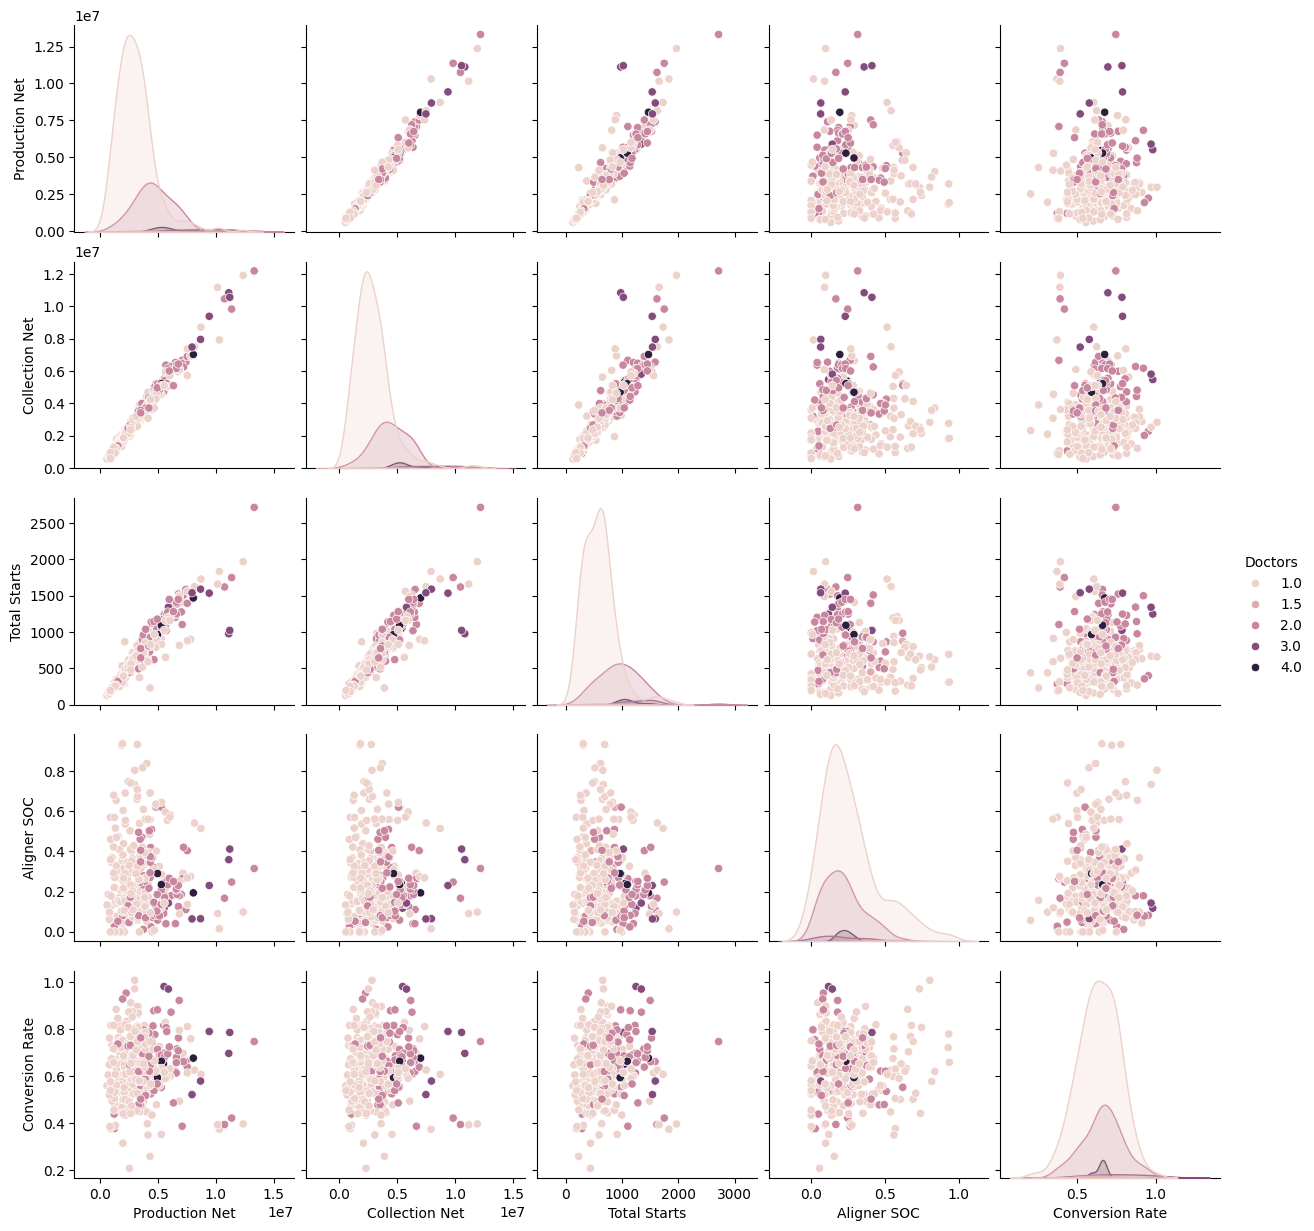

In [ ]:
sns.pairplot(main_metric_df[['Doctors', 'Production Net', 'Collection Net', 'Total Starts', 'Aligner SOC', 'Conversion Rate']], hue="Doctors")

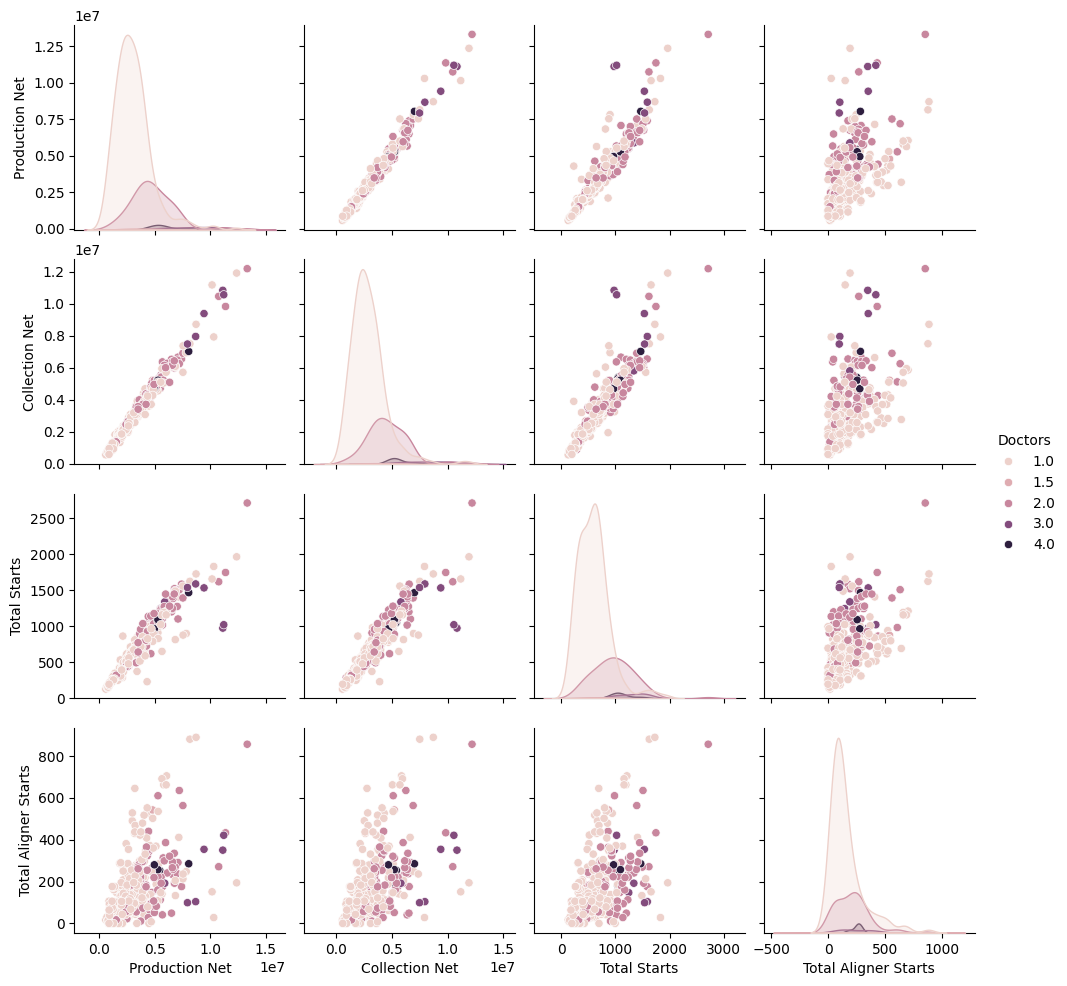

In [ ]:
sns.pairplot(main_metric_df[['Doctors', 'Production Net', 'Collection Net', 'Total Starts', 'Total Aligner Starts']], hue="Doctors")

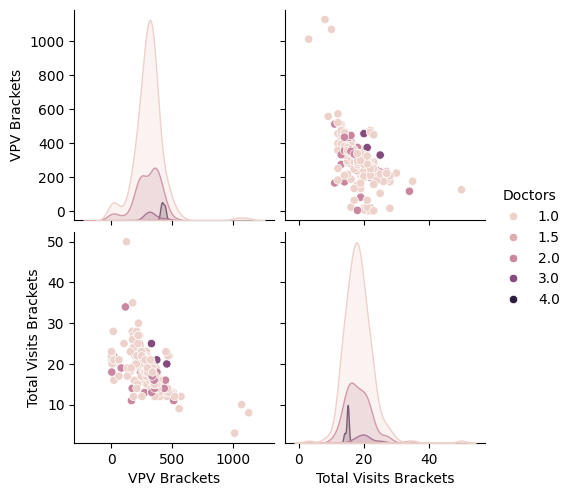

In [ ]:
sns.pairplot(main_metric_df[['Doctors', 'VPV Brackets', 'Total Visits Brackets']], hue="Doctors")

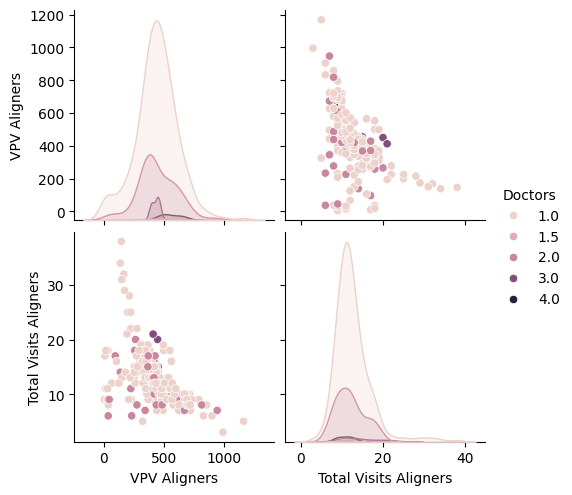

In [ ]:
sns.pairplot(main_metric_df[['Doctors', 'VPV Aligners', 'Total Visits Aligners']], hue="Doctors")

data (features X, label y)


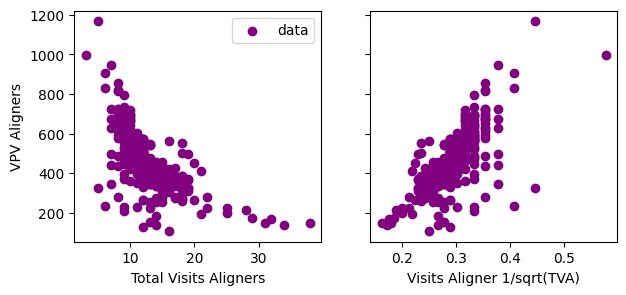



FEATURES


,Total Visits Aligners,Visits Aligner 1/sqrt(TVA)
count,328.00,328.00
mean,12.47,0.29
std,4.28,0.05
min,3.00,0.16
25%,10.00,0.27
50%,12.00,0.29
75%,14.00,0.32
max,38.00,0.58




LABEL


,VPV Aligners
count,328.00
mean,459.82
std,150.22
min,106.00
25%,366.00
50%,448.50
75%,554.25
max,1168.00




linear regression
Mean Squared Error: 12112.538115472691
root mse: 110.0569766778676
Coefficients: [[-2.00e+00  2.31e+03]]
Intercept: [-195.31]


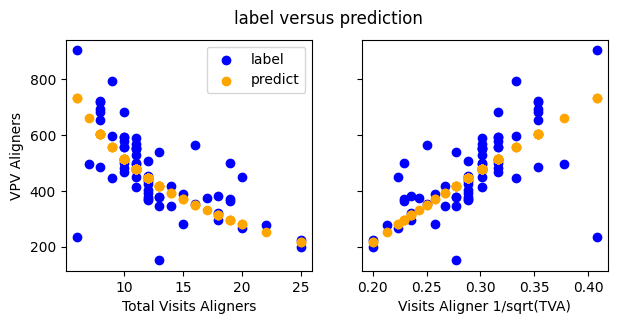



linear regression (scaled)
Mean Squared Error: 12112.538115472691
root mse: 110.0569766778676
Coefficients: [[ -8.56 103.78]]
Intercept: [456.93]


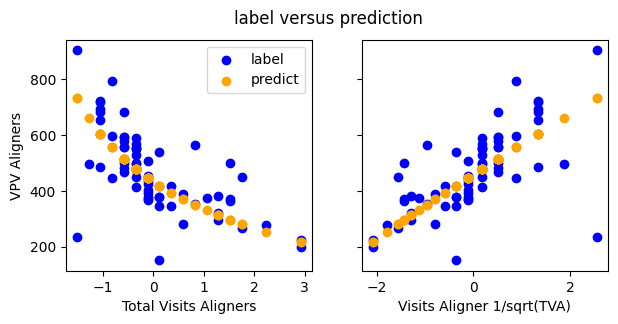



stochastic gradient descent
sgd regressor - number of iterations completed: 56, number of weight updates: 14673.0
Mean Squared Error: 11993.324613942843
root mse: 109.5140384331746
Coefficients: [-14.89  96.64]
Intercept: [457.27]
plot of unnormed test data


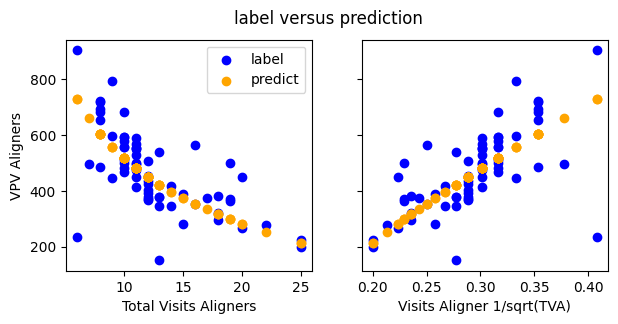

plot of normed test data


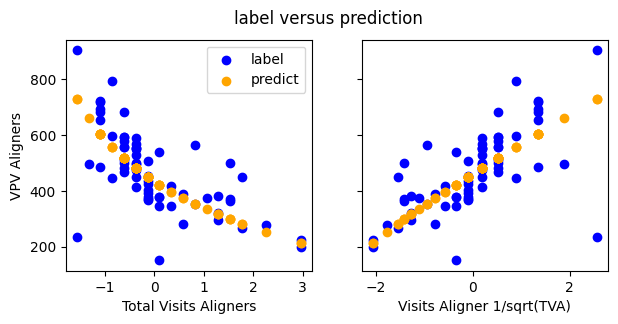

plot of unnormed train data


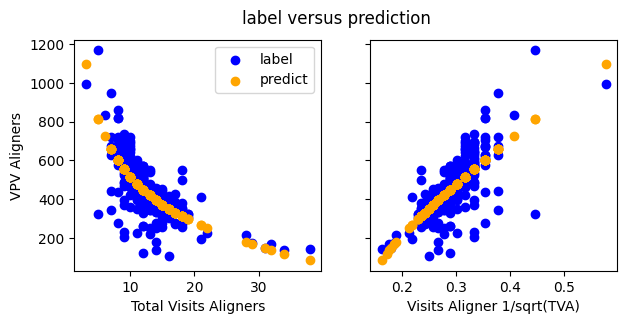

In [ ]:
test_feature_columns_2 = ['Total Visits Aligners', 'Visits Aligner 1/sqrt(TVA)']
test_label_column_2 = 'VPV Aligners'

test_df_2 = full_df.copy()

# filter and/or transform
test_df_2 = test_df_2[(test_df_2['Total Visits Aligners'] > 0) & (test_df_2['VPV Aligners'] > 100)]
test_df_2['Visits Aligner 1/sqrt(TVA)'] = 1 / (test_df_2['Total Visits Aligners']) ** (0.5)

handle_model(test_df_2, test_feature_columns_2, test_label_column_2)

data (features X, label y)


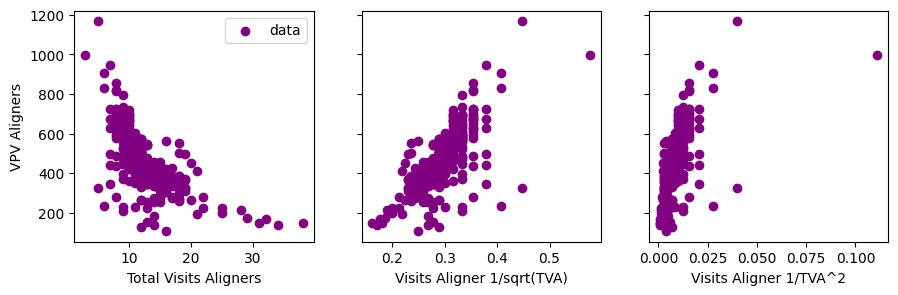



FEATURES


,Total Visits Aligners,Visits Aligner 1/sqrt(TVA),Visits Aligner 1/TVA^2
count,328.00,328.00,328.00
mean,12.47,0.29,0.01
std,4.28,0.05,0.01
min,3.00,0.16,0.00
25%,10.00,0.27,0.01
50%,12.00,0.29,0.01
75%,14.00,0.32,0.01
max,38.00,0.58,0.11




LABEL


,VPV Aligners
count,328.00
mean,459.82
std,150.22
min,106.00
25%,366.00
50%,448.50
75%,554.25
max,1168.00




linear regression
Mean Squared Error: 12285.58660652194
root mse: 110.84036542037354
Coefficients: [[    5.49  3617.36 -4505.25]]
Intercept: [-634.59]


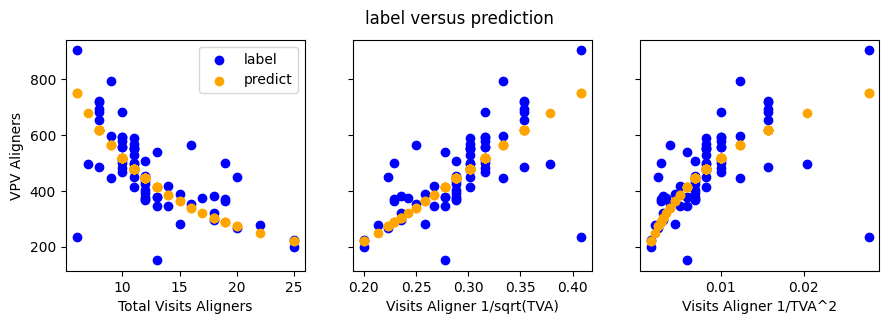



linear regression (scaled)
Mean Squared Error: 12285.586606521878
root mse: 110.84036542037327
Coefficients: [[ 23.47 162.74 -34.17]]
Intercept: [457.06]


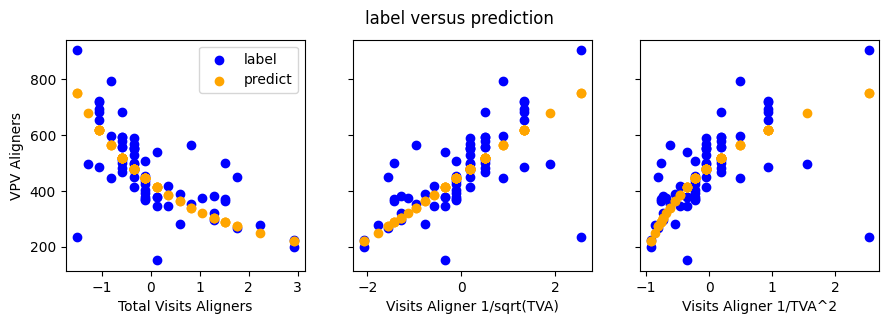



stochastic gradient descent
sgd regressor - number of iterations completed: 91, number of weight updates: 23843.0
Mean Squared Error: 11954.162883887519
root mse: 109.33509447513876
Coefficients: [-15.2  101.57  -5.05]
Intercept: [457.51]
plot of unnormed test data


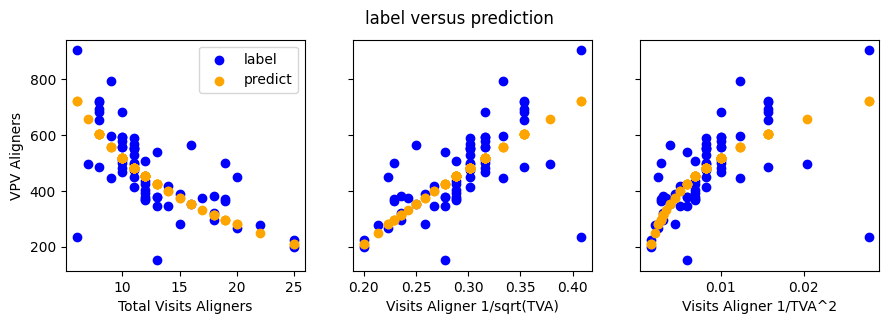

plot of normed test data


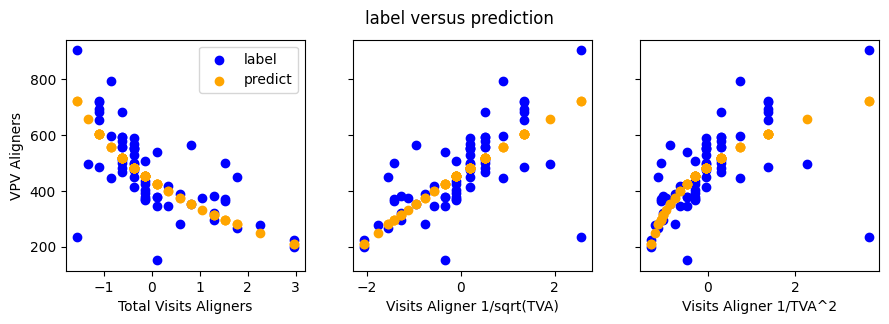

plot of unnormed train data


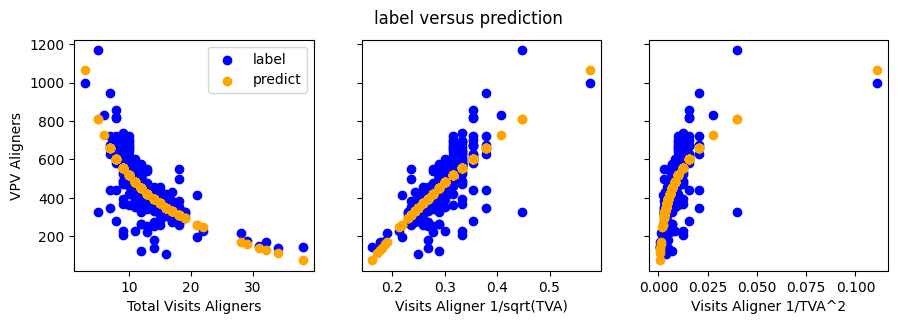

In [ ]:
test_feature_columns_3 = ['Total Visits Aligners', 'Visits Aligner 1/sqrt(TVA)', 'Visits Aligner 1/TVA^2']
test_label_column_3 = 'VPV Aligners'

test_df_3 = full_df.copy()

# filter and/or transform
test_df_3 = test_df_3[(test_df_3['Total Visits Aligners'] > 0) & (test_df_3['VPV Aligners'] > 100)]
test_df_3['Visits Aligner 1/sqrt(TVA)'] = 1 / test_df_3['Total Visits Aligners'] ** 0.5
test_df_3['Visits Aligner 1/TVA^2'] = 1 / test_df_3['Total Visits Aligners'] ** 2

handle_model(test_df_3, test_feature_columns_3, test_label_column_3)

data (features X, label y)


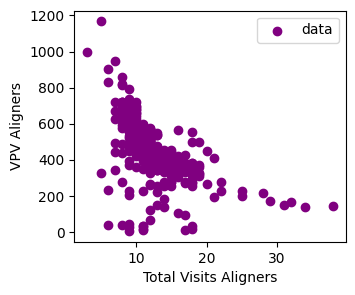



FEATURES


,Total Visits Aligners
count,342.00
mean,12.45
std,4.27
min,3.00
25%,10.00
50%,12.00
75%,14.00
max,38.00




LABEL


,VPV Aligners
count,342.00
mean,442.38
std,169.72
min,5.00
25%,355.00
50%,439.50
75%,550.75
max,1168.00




linear regression
Mean Squared Error: 30435.959417524038
root mse: 174.45904796691985
Coefficients: [[-21.17]]
Intercept: [711.03]


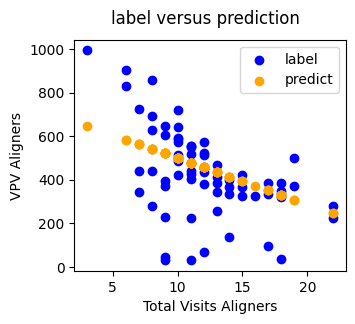



linear regression (scaled)
Mean Squared Error: 30435.959417524038
root mse: 174.45904796691985
Coefficients: [[-90.17]]
Intercept: [447.55]


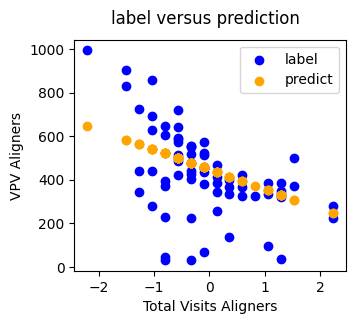



stochastic gradient descent
sgd regressor - number of iterations completed: 41, number of weight updates: 11194.0
Mean Squared Error: 29711.10653990245
root mse: 172.36909972469672
Coefficients: [-91.76]
Intercept: [445.42]
plot of unnormed test data


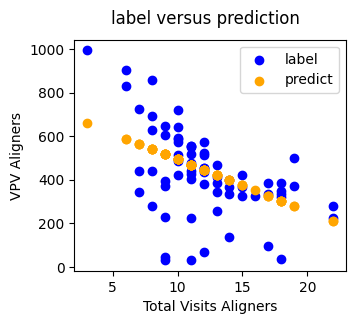

plot of normed test data


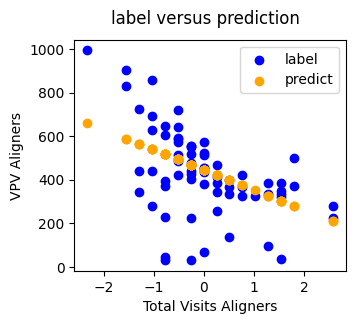

plot of unnormed train data


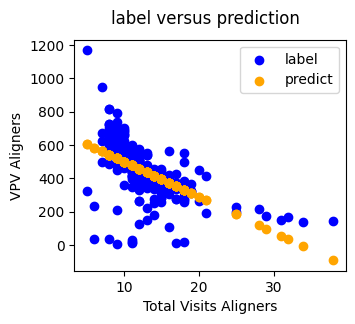

In [ ]:
handle_model(full_df.copy(), ['Total Visits Aligners'], 'VPV Aligners')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
